<a href="https://colab.research.google.com/github/benedictusdps/DataCamp-Applied-Finance/blob/main/Portfolio_Investment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read the csv from Github and sort the values by date
StockReturns = pd.read_csv('https://raw.githubusercontent.com/benedictusdps/DataCamp-Applied-Finance/main/FB%20JPM%20BP.csv', parse_dates=['Date'])
StockReturns = StockReturns.sort_values(by='Date')
StockReturns.set_index('Date', inplace=True)
print(StockReturns.head())

                  FB       JPM        BP
Date                                    
2021-01-04 -0.015449 -0.009444  0.015107
2021-01-05  0.007548  0.005441  0.074412
2021-01-06 -0.028269  0.046956  0.046023
2021-01-07  0.020622  0.032839  0.021358
2021-01-08 -0.004354  0.001104  0.020494


In [37]:
trading_days = len(StockReturns.index)
print(trading_days)

252


In [5]:
# Define the portfolio weights as a numpy array
portfolio_weights = np.array([0.3, 0.4, 0.3])

In [6]:
# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)

In [8]:
# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)
print(StockReturns.head())

                  FB       JPM        BP  Portfolio
Date                                               
2021-01-04 -0.015449 -0.009444  0.015107  -0.003880
2021-01-05  0.007548  0.005441  0.074412   0.026765
2021-01-06 -0.028269  0.046956  0.046023   0.024109
2021-01-07  0.020622  0.032839  0.021358   0.025730
2021-01-08 -0.004354  0.001104  0.020494   0.005284


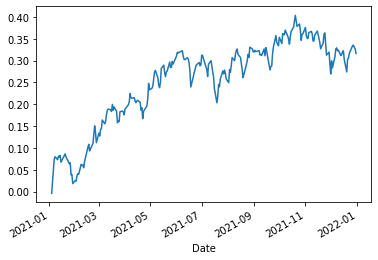

In [10]:
# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1 + StockReturns['Portfolio']).cumprod() - 1)
CumulativeReturns.plot()
plt.show()

In [12]:
def cumulative_returns_plot(cols):
  """cols: A list of column names to plot"""
  CumulativeReturns = ((1 + StockReturns[cols]).cumprod() - 1)
  CumulativeReturns.plot()
  plt.show

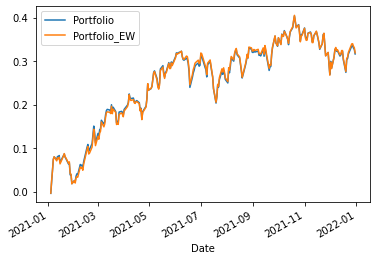

In [13]:
# Naive portfolio
# Number of stocks in the portfolio
numstocks = 3

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio', 'Portfolio_EW'])

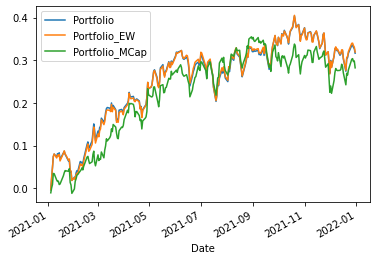

In [21]:
# Portfolio based on market capitalization
# Market cap based on 20/02/2022
market_capitalizations = np.array([561.16, 449.61, 76.33])

# Calculate the market cap weights
mcap_weights = market_capitalizations / sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:numstocks].mul(mcap_weights, axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio', 'Portfolio_EW', 'Portfolio_MCap'])

In [22]:
# Calculate the correlation matrix
correlation_matrix = StockReturns.iloc[:,0:numstocks].corr()
print(correlation_matrix)

           FB       JPM        BP
FB   1.000000  0.065388 -0.002133
JPM  0.065388  1.000000  0.487871
BP  -0.002133  0.487871  1.000000


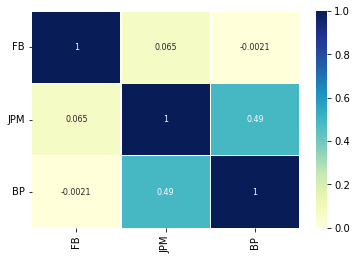

In [25]:
import seaborn as sns

# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu",
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [39]:
# Calculate the covariance matrix
cov_mat = StockReturns.iloc[:,0:numstocks].cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat * trading_days
print(cov_mat_annual)

           FB       JPM        BP
FB   0.087413  0.004130 -0.000210
JPM  0.004130  0.045647  0.034679
BP  -0.000210  0.034679  0.110689


In [45]:
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print("The portfolio standard deviation is",portfolio_volatility)

The portfolio standard deviation is 0.18549709793942354
